In [1]:
import pandas as pd
df=pd.read_csv("stock_data_2021.csv")
df.tail()

,symbol,date,open,high,low,close,volume,adjclose,dividends,splits,Symbol
1989,005930.KS,23/12/2022,58200.0,58400.0,57700.0,58100.0,9829407,57121.50391,0.0,NaN,005930.KS
1990,005930.KS,26/12/2022,58000.0,58100.0,57700.0,57900.0,6756411,56924.87500,0.0,NaN,005930.KS
1991,005930.KS,27/12/2022,58000.0,58400.0,57900.0,58100.0,10667027,57121.50391,0.0,NaN,005930.KS
1992,005930.KS,28/12/2022,57600.0,57600.0,56400.0,56600.0,14665410,55994.68359,361.0,NaN,005930.KS
1993,005930.KS,29/12/2022,56000.0,56200.0,55300.0,55300.0,11295935,54708.58984,0.0,NaN,005930.KS


17:40:41 - cmdstanpy - INFO - Chain [1] start processing
17:40:41 - cmdstanpy - INFO - Chain [1] done processing


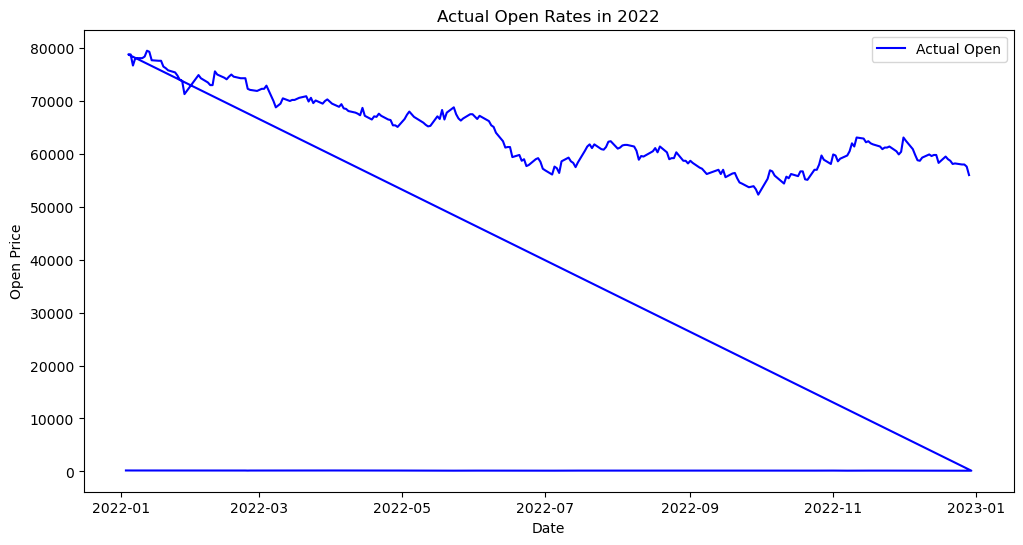

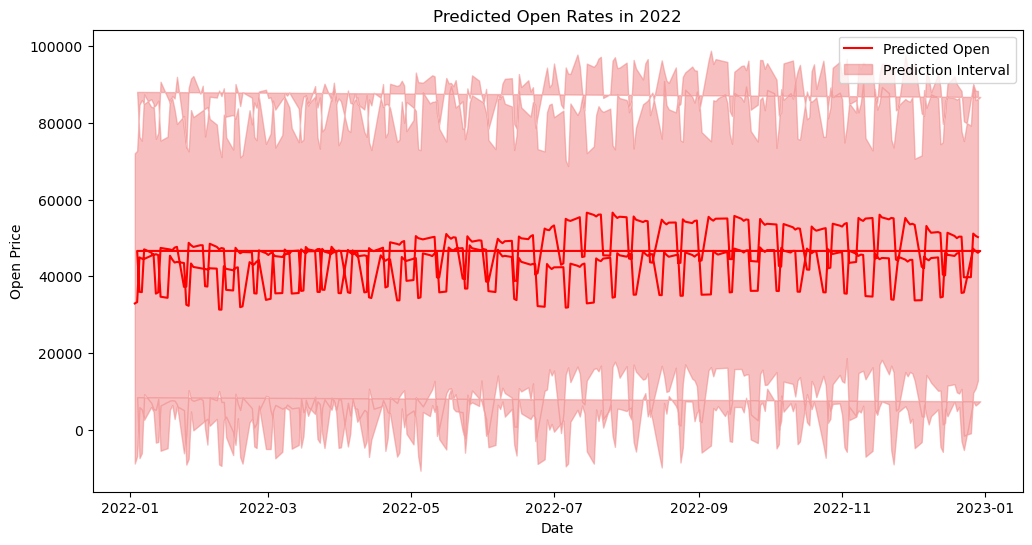

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet  # Import Prophet from the 'fbprophet' library

class TimeSeriesAnalysis:
    def __init__(self, data):
        self.data = data
        self.train_data = None
        self.test_data = None
        self.model = None
        self.forecast = None

    def prepare_data(self, start_year, end_year):
        # Convert the 'date' column to a datetime object
        self.data['date'] = pd.to_datetime(self.data['date'], format='%d/%m/%Y')
        
        # Filter data for training (2019-2021) and testing (2022)
        self.train_data = self.data[(self.data['date'].dt.year >= start_year) & (self.data['date'].dt.year <= end_year)]
        self.test_data = self.data[self.data['date'].dt.year == 2022]

    def train_model(self):
        # Initialize and fit the Prophet model
        self.model = Prophet()
        self.model.fit(self.train_data.rename(columns={'date': 'ds', 'open': 'y'}))  # Adjust column names here

    def forecast_open(self):
        # Create a dataframe for future dates
        future = self.model.make_future_dataframe(periods=len(self.test_data))
        
        # Forecast the 'open' column for 2022
        forecast = self.model.predict(future)
        self.forecast = forecast.tail(len(self.test_data))  # Extract the forecast for the test period

    def plot_actual(self):
        plt.figure(figsize=(12, 6))
        plt.plot(self.test_data['date'], self.test_data['open'], label='Actual Open', color='blue')
        plt.title('Actual Open Rates in 2022')
        plt.xlabel('Date')
        plt.ylabel('Open Price')
        plt.legend()
        plt.show()

    def plot_predicted(self):
        plt.figure(figsize=(12, 6))
        plt.plot(self.test_data['date'], self.forecast['yhat'], label='Predicted Open', color='red')
        plt.fill_between(self.test_data['date'], self.forecast['yhat_lower'], self.forecast['yhat_upper'], color='lightcoral', alpha=0.5, label='Prediction Interval')
        plt.title('Predicted Open Rates in 2022')
        plt.xlabel('Date')
        plt.ylabel('Open Price')
        plt.legend()
        plt.show()

if __name__ == '__main__':
    data = pd.read_csv('stock_data_2021.csv')  

    # an instance of the TimeSeriesAnalysis class
    ts_analysis = TimeSeriesAnalysis(data)

    # data for training 
    ts_analysis.prepare_data(2019, 2021)

    ts_analysis.train_model()

    # Forecast the 'open' column for 2022
    ts_analysis.forecast_open()

    ts_analysis.plot_actual()
    ts_analysis.plot_predicted()
